## Descriptive Statistics

- mean: np.mean(data)
- median: np.median(data)
- mode: np.mode(data)
- variance: np.var(data)
- std div: np.std(data)
- range: np.ptp(data)
- stats.describe(data)
- 75th percent: np.percentile(data, 75)
- quantile: np.quantile(data, [0.25, 0.5, 0.75])
- coefficient of variation: stats.variation(data)

## Probability Distribution

- normal disribution: stats.norm.pdf(x, loc=0, scale=1) or stats.norm.cdf(x, loc=0, scale=1)

## Hypothesis Testing

- paired t-test: stats.ttest_rel(data1, data2)
- one way ANOVA: stats.f_oneway(data1, data2, data3)
- kruskal-wallis H-test: stats.kruskal(data1, data2, data3)

## Multivariate Analysis

- PCA: from sklearn.decomposition import PCA; PCA().fit_transform(X)
- Canonical correlation analysis: from sklearn.cross_decomposition import CCA; CCA().fit(X, Y).transform(X, Y)

## Time Series Analysis

- autocorrelation: stats.autocorr(data)

## Cluster Analysis

- k-mean clustering: from sklearn.cluster import KMeans; KMeans(n_clusters=k).fit(X)
- Hierarchical clustering: from sklearn.cluster.hierarchy import linkage; linkage(X, method='ward')


In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io, base64

file = '/home/aniket-yadav/WORKSPACE/WebProjects/.visenv/Visualizer/staticfiles/Data/ProstateCancer.xlsx'
df = pd.read_excel(file, sheet_name='ProstateCancer')
spcCent = df["Specialized Centers"].astype(float).to_list()



RangeIndex(start=0, stop=42, step=1)

In [ ]:

def get_descriptive_statistics(df, alter=2):
    """
    Calculate descriptive statistics for each column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    
    Returns:
    pd.DataFrame: DataFrame containing the descriptive statistics.
    """
    datavals = {}
    for i in range(df.shape[1]-alter):
        data = df.iloc[:, (alter-1)+i].astype(float).to_list()
        datavals[df.iloc[:, (alter-1)+i].name] = {
            "mean": np.mean(data).__float__(),
            "median": np.median(data).__float__(),
            "std": np.std(data).__float__(),
            "variance": np.var(data).__float__(),
            "min": np.min(data).__float__(),
            "max": np.max(data).__float__(),
            "skew": stats.skew(data).__float__(),
            "kurtosis": stats.kurtosis(data).__float__(),
            "coefficient of variation": stats.variation(data).__float__(),
            "75th percentile": np.percentile(data, 75).__float__(),
            "50th percentile": np.percentile(data, 50).__float__(),
            "25th percentile": np.percentile(data, 25).__float__(),
            "interquartile range": stats.iqr(data).__float__(),
        }
    dstat = pd.DataFrame.from_dict(datavals, orient='index').transpose().transform(lambda x: x.round(3))
    # dstat = pd.read_json(dstat)
    return dstat

dstat = get_descriptive_statistics(df)
dstat

,Specialized Centers,Genetic & Molecular Testing Infrastructure (1–5),Treatment Access,Research Funding,Awareness Campaigns,Survival Rates,Early Detection,Palliative Care,PSA,TMPRSS2-ERG,PTEN,Unnamed: 4,Clinical Guideline Implementation (1-5),Feasibility of Integration (1-5),Adoption of Int'l Guidelines (1-5),Engagement with Updates (1-3),ESMO Guidelines Implementation (1-5),Reimbursement Framework,No-cost Access
mean,3.262,3.429,2.881,3.071,3.167,3.167,3.048,3.000,55.833,26.905,22.476,35.048,3.571,3.524,3.500,2.071,3.190,2.143,2.095
median,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,55.000,25.000,20.000,33.000,4.000,4.000,3.500,2.000,3.000,2.000,2.000
std,1.415,1.256,1.295,1.280,1.308,1.462,1.308,1.327,22.091,13.361,13.039,15.943,1.256,1.258,1.258,0.703,1.468,0.774,0.750
variance,2.003,1.578,1.676,1.638,1.710,2.139,1.712,1.762,487.996,178.515,170.011,254.188,1.578,1.583,1.583,0.495,2.154,0.599,0.562
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,15.000,5.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000
max,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,95.000,50.000,45.000,60.000,5.000,5.000,5.000,3.000,5.000,3.000,3.000
skew,-0.116,-0.343,0.090,-0.065,-0.118,0.030,-0.024,0.122,-0.133,0.143,0.198,0.024,-0.594,-0.484,-0.430,-0.100,-0.196,-0.560,-0.496
kurtosis,-1.251,-0.816,-1.196,-1.007,-0.978,-1.431,-1.152,-1.144,-1.117,-1.044,-1.159,-1.211,-0.603,-0.698,-0.734,-0.980,-1.358,-0.267,-0.135
coefficient of variation,0.434,0.366,0.449,0.417,0.413,0.462,0.429,0.442,0.396,0.497,0.580,0.455,0.352,0.357,0.360,0.340,0.460,0.361,0.358
75th percentile,5.000,4.750,4.000,4.000,4.000,5.000,4.000,4.000,80.000,38.750,35.000,52.000,5.000,5.000,5.000,3.000,4.750,3.000,3.000


In [ ]:
def dataframe_to_column_json(df):
    """
    Converts a Pandas DataFrame to a JSON object where each column's data is stored separately.
    Args:
        df (pd.DataFrame): Input DataFrame with columns like 'country', 'incidence_rate', etc.
    Returns:
        dict: JSON-compatible dict with columns and their data lists.
    """
    result = {
        'columns': list(df.columns),
        'column_data': {}
    }
    
    # Iterate through each column
    for column in df.columns:
        # Convert column data to list, handling nulls and data types
        if column == 'country' or column == 'description':
            # Keep strings as is (text columns)
            result['column_data'][column] = df[column].fillna('No data').tolist()
        else:
            # Convert numerical columns to float, handle nulls
            result['column_data'][column] = pd.to_numeric(df[column], errors='coerce').fillna(0).tolist()
    
    return result

dataframe_to_column_json(dstat)

{'columns': ['Specialized Centers',
  'Genetic & Molecular Testing Infrastructure (1–5)',
  'Treatment Access',
  'Research Funding',
  'Awareness Campaigns',
  'Survival Rates',
  'Early Detection',
  'Palliative Care',
  'PSA',
  'TMPRSS2-ERG',
  'PTEN',
  'Unnamed: 4',
  'Clinical Guideline Implementation (1-5)',
  'Feasibility of Integration (1-5)',
  "Adoption of Int'l Guidelines (1-5)",
  'Engagement with Updates (1-3)',
  'ESMO Guidelines Implementation (1-5)',
  'Reimbursement Framework',
  'No-cost Access'],
 'column_data': {'Specialized Centers': [3.262,
   3.0,
   1.415,
   2.003,
   1.0,
   5.0,
   -0.116,
   -1.251,
   0.434,
   5.0,
   3.0,
   2.0,
   3.0],
  'Genetic & Molecular Testing Infrastructure (1–5)': [3.429,
   3.0,
   1.256,
   1.578,
   1.0,
   5.0,
   -0.343,
   -0.816,
   0.366,
   4.75,
   3.0,
   3.0,
   1.75],
  'Treatment Access': [2.881,
   3.0,
   1.295,
   1.676,
   1.0,
   5.0,
   0.09,
   -1.196,
   0.449,
   4.0,
   3.0,
   2.0,
   2.0],
  'Researc

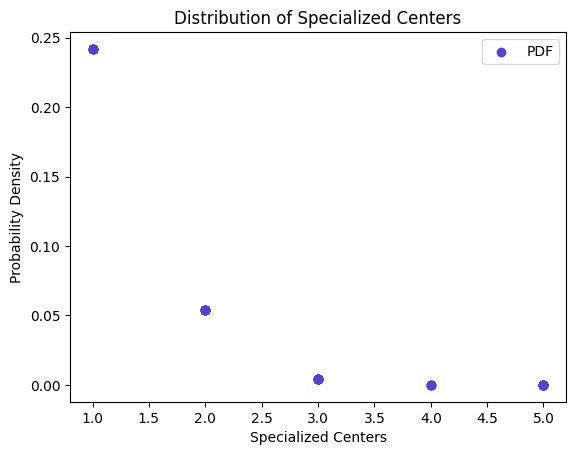

In [10]:
pdf = stats.norm.pdf(spcCent, loc=0, scale=1)
plt.scatter(spcCent, pdf, color='#5743c8')
plt.title('Distribution of Specialized Centers')
plt.xlabel('Specialized Centers')
plt.ylabel('Probability Density')
plt.legend(['PDF'])
plt.show()

In [ ]:
def plot_generator(column_, title, xlabel='Date', ylabel='Value', kind='bar'):
    column_.plot(kind=kind, figsize=(10, 5), title=title, xlabel=xlabel, ylabel=ylabel)

    # Save plot to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close() # Close the plot to free memory

    # Encode the image to base64
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

plot_generator(df["Specialized Centers"], 'Specialized Centers Over Time', xlabel='Time', ylabel='Centers')

iVBORw0KGgoAAAANSUhEUgAAA+gAAAH0CAYAAACuKActAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAATKhJREFUeJzt3XlYVOX///H3sKMsooDiBu6Gu6TmlmYYqblVmn5yrcw9ybKkMrUybfPTbum3LNu0XFo+ZeZuppbiXpqKouSCW4KAosL794cX83MEZJBx5gafj+ua62LOOXPP+x4Oh3ndZ7OoqgoAAAAAAHApN1cXAAAAAAAACOgAAAAAABiBgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAONZLBaZNGlSoV+3atUqsVgssmrVKuu0QYMGSUREhMNqs0diYqJYLBb55JNPnPq+MN8nn3wiFotFEhMTXV0KAMAABHQAgOzYsUPuv/9+CQ8PFx8fH6lUqZJ07NhR3nnnHVeXdlNKTk6WJ598UurWrSulSpWS0qVLS1RUlLz00kty5syZG/a+GRkZMmnSJJsBDZP8+eef0q9fP6lUqZJ4e3tLxYoV5cEHH5Q///zT1aXZaN++vVgslgIf1zPo

In [47]:
avgData = pd.read_csv('/home/aniket-yadav/WORKSPACE/WebProjects/.visenv/Visualizer/staticfiles/Data/AvgAllTypeCancer.csv')

avgData

,Type,Country,InfraAvg,Treatment_Avg,SEdPc_Avg,Biomark_Avg,Clinical_Avg
0,Breast,South Africa,4.0,3.0,3.0,3.6,2.8
1,Breast,Kenya,2.0,2.0,2.0,2.6,1.8
2,Breast,Nigeria,2.0,2.0,1.7,2.0,1.8
3,Breast,Egypt,3.5,3.0,3.0,3.6,3.0
4,Breast,Morocco,3.5,2.3,3.0,2.6,2.6
...,...,...,...,...,...,...,...
197,Gastric,Indonesia,2.5,2.3,2.3,1.4,1.6
198,Gastric,Vietnam,2.5,2.3,2.3,1.4,1.6
199,Gastric,Philippines,2.5,2.3,2.3,1.4,1.6
200,Gastric,Russia,4.0,3.3,3.0,2.6,3.6


In [48]:
cancer_type = 'prostate'
avgData = avgData[avgData['Type'] == cancer_type.title()]
avgDataTransposed = avgData.iloc[:,1:].set_index('Country').transpose()
get_descriptive_statistics(avgDataTransposed, alter=0)


,Malaysia,South Africa,Kenya,Nigeria,Egypt,Morocco,Algeria,Ethiopia,India,Japan,...,Rwanda,Uganda,Serbia,Saudi Arabia,UAE,Syria,Indonesia,Vietnam,Philippines,Russia
mean,2.640,2.580,1.180,1.180,2.100,1.860,1.760,0.900,2.540,3.600,...,0.880,0.900,2.660,3.460,3.500,0.960,2.020,2.040,2.180,3.360
median,2.700,3.000,1.000,1.000,2.000,2.000,2.000,1.000,3.000,4.300,...,1.000,1.000,2.700,4.000,4.000,1.000,2.000,2.300,2.300,3.700
std,0.080,0.560,0.312,0.312,0.429,0.436,0.320,0.200,0.736,1.527,...,0.240,0.200,0.641,0.894,0.815,0.080,0.349,0.653,0.397,0.728
variance,0.006,0.314,0.098,0.098,0.184,0.190,0.102,0.040,0.542,2.332,...,0.058,0.040,0.410,0.798,0.664,0.006,0.122,0.426,0.158,0.530
min,2.500,1.600,0.800,0.800,1.400,1.200,1.200,0.500,1.100,0.800,...,0.400,0.500,1.700,1.700,1.900,0.800,1.500,0.800,1.500,2.100
max,2.700,3.000,1.600,1.600,2.600,2.500,2.000,1.000,3.000,5.000,...,1.000,1.000,3.600,4.000,4.000,1.000,2.600,2.600,2.600,4.000
skew,-0.844,-0.844,0.264,0.264,-0.395,-0.090,-0.844,-1.500,-1.349,-0.988,...,-1.500,-1.500,-0.047,-1.395,-1.375,-1.500,0.257,-1.161,-0.677,-0.768
kurtosis,-0.922,-0.922,-1.645,-1.645,-1.060,-0.998,-0.922,0.250,0.014,-0.535,...,0.250,0.250,-1.029,0.091,0.058,0.250,-0.480,-0.237,-0.933,-0.948
coefficient of variation,0.030,0.217,0.265,0.265,0.204,0.235,0.182,0.222,0.290,0.424,...,0.273,0.222,0.241,0.258,0.233,0.083,0.173,0.320,0.182,0.217
75th percentile,2.700,3.000,1.500,1.500,2.500,2.000,2.000,1.000,3.000,4.700,...,1.000,1.000,3.000,4.000,4.000,1.000,2.000,2.500,2.500,4.000


1